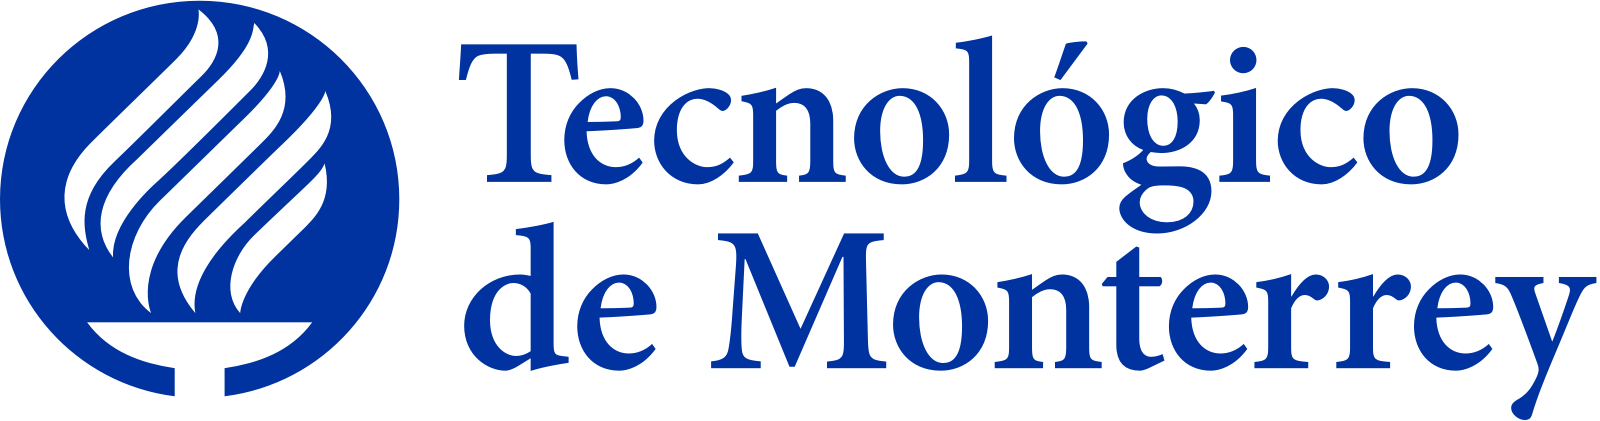

# **Reto entregable 1**
* Guillermo Villegas Morales A01637169
* Adara Luisa Pulido Sánchez A01642450
* Jorge Eduardo Guijarro Márquez A01563113
* Alan Rojas López A01706146
* Gabriel Eduardo Meléndez Zavala A01638293





# Introducción
En este entregable realizamos una fase exploratoria de una base de datos de canciones donde cada entrada es una canción y sus atributos constan del nombre del artista/s, nombre de la canción, tonalidad, popularidad, duración entre otros. La base de datos tiene problemas como datos basura o datos faltantes, limpiearemos la base de datos para obtener un análisis propio, además de que realizamos diferentes estadísticas descriptivas.

# Objetivos
Nuestro objetivo principal es tener una base de datos limpia y completa. Adicional a esto empezamos con el análisis exploratorio. Realizamos un heatmap para detectar covarianzas dentro los atributos, un boxplot por columna para tener una mejor idea de la distribución de los datos de cada columna y un wordcloud para encontrar las palabras más frecuentes en los nombres de artistas y de canciones

# Métodos

### Import Libraries

In [92]:
import numpy as np # lots of math operations and matrices
import pandas as pd # data structures
import matplotlib.pyplot as plt # plot charts. More on this later
from scipy import stats as st
import seaborn as sns
from wordcloud import WordCloud


df=pd.read_csv("music.csv")

### Información básica de la base de datos


In [93]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Buscamos los datos nulos dentro de la base de datos


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

Análisis rápido de cada columna

In [95]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Dimensión de  la matríz

In [96]:
df.shape

(17996, 17)

### Imputación Simple
Se detectaron valores faltantes en las columnas de "instrumentalness", "key" y "Popularity". Utilizando media y moda, re realizó una amputación simple de valores. Para los datos faltantes de 'instrumentalness' y 'popularity' introducimos el promedio de la columna. Para la columna de valores discretos 'key' introducimos el 0 donde faltaran valores ya que las columnas sin estos valores estaban en la toanlidad de C.

In [97]:
df['instrumentalness'].fillna(np.mean(df.instrumentalness),inplace=True)
df['Popularity'].fillna(np.mean(df.Popularity),inplace=True)
df['key'].fillna(0, inplace = True)

### Clasificación de variables
* Artist name: categórica

* Track name: categórica

* Popularity: numérica

* danceability: numérica

* energy: numérica

* key: numérica

* loudness: numérica

* mode: numérica

* speechiness: numérica

* acousticness: numérica

* instrumentalness: numérica

* liveness: numérica

* valence: numérica

* tempo: numérica

* duration_in min/ms: numérica

* time_signature:numérica

* Class: categórica

In [98]:
df.info() #Show the changes that were made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

Como podemos ver, todas las columnas tienen 17996 datos no nulos

### Creando nueva clase de Género
Al estar codificada la variable "Class" en números del 1 al 10 es necesario interpretar los números con respecto a cada uno de los géneros musicales. En Base a la tabla proporcionada se crea una nueva variable llamada "Genre" que representa explicítamente el género al que pertenece cada canción.

In [99]:
#Create a function that relates the numerical values of class to its corresponding genre
def class_to_genre(row):
    if row == 0:
        return 'Acoustic/Folk'
    elif row == 1:
        return 'Alternative'
    elif row == 2:
       return 'Blues'
    elif row == 3:
       return 'Bollywood'
    elif row == 4:
       return 'Country'
    elif row == 5:
        return 'Hip-Hop'
    elif row == 6:
       return 'Indie'
    elif row == 7:
        return 'Instrumental'
    elif row == 8:
        return 'Metal'
    elif row == 9:
        return 'Pop'
    elif row == 10:
        return 'Rock'

df['Genre'] = df['Class'].apply(class_to_genre)
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Genre
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,5,Hip-Hop
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6,Indie
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,5,Hip-Hop
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10,Rock


### New class Key
Similar al proceso anterior, decodificamos el atributo 'key' de los registros donde el 0.0 recibe el la calsificación de C, 1.0 de C#, ... y 11.0 de B. dentro de una nueva variable categórica 'Key'.

In [100]:
def class_to_Key(row):
    if row == 0.0:
        return 'C'
    elif row == 1.0:
        return 'C#'
    elif row == 2.0:
       return 'D'
    elif row == 3.0:
       return 'D#'
    elif row == 4.0:
       return 'E'
    elif row == 5.0:
        return 'F'
    elif row == 6.0:
       return 'F#'
    elif row == 7.0:
        return 'G'
    elif row == 8.0:
        return 'G#'
    elif row == 9.0:
        return 'A'
    elif row == 10.0:
        return 'A#'
    elif row == 11.0:
        return 'B'

df['Key'] = df['key'].apply(class_to_Key)
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Genre,Key
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,5,Hip-Hop,C#
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10,Rock,D#
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6,Indie,F#
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,5,Hip-Hop,A#
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10,Rock,D


### Histogramas


<Axes: xlabel='duration_in min/ms', ylabel='Count'>

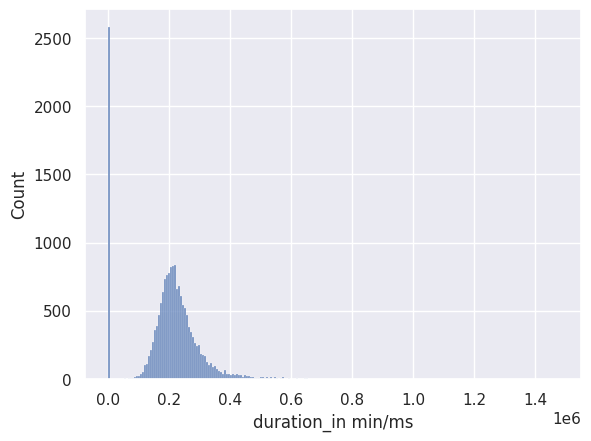

In [101]:
sns.histplot(data=df,x="duration_in min/ms")

In [102]:
df.loc[df['duration_in min/ms']<100, 'duration_in min/ms']=df.loc[df['duration_in min/ms']<100, 'duration_in min/ms']*60000
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Genre,Key
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,5,Hip-Hop,C#
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10,Rock,D#
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6,Indie,F#
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,5,Hip-Hop,A#
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10,Rock,D


Text(0.5, 1.0, 'Duracion de las canciones')

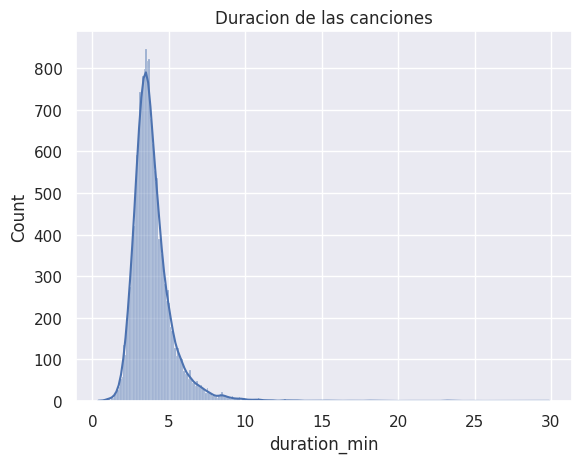

In [103]:
df['duration_min'] = df['duration_in min/ms']/60000
sns.histplot(data=df,x="duration_min", kde = True).set_title('Duracion de las canciones')

Con el fin de observar la distribución de frecuencias del tiempo en cada una de las canciones se genera un histograma de la variable "duration in min/ms". Sin embargo, al revisar la gráfica  se observa una gran cantidad de datos en la duración 3 min, al corroborar con la base de datos se encontró que algunas canciones estaban en minutos mientras que otras estaban escritas como milisegundos. Por lo tanto se comprueba la medida de la duración en cada una de las canciones, aquellas con valores menores a 100 se multiplican por 60000 para convertirlos a minutos. Una vez se tiene todos los datos de la duración en minutos se vuelve a generar un histograma de la misma variable con los datos correctamente medidos.

In [119]:
df['duration_min'].describe()

count    17996.000000
mean         3.930388
std          1.427917
min          0.388667
25%          3.127496
50%          3.666667
75%          4.384704
max         29.886000
Name: duration_min, dtype: float64

Se observa que al generar esta nueva columna de datos que describe la duracion en minutos de las canciones resalta que la maxima de los datos es de 29.86 mientras la media es de 3.93 con una std de 1.43.
Por lo tanto seria importante hacer un analisis para determinar si todos los datos son relevantes para el analisis ya que existen valores extraordinarios

### Nueva variable "collab"
Aquí creamos una nueva variable booleana 'collab' donde 1 significa que la canción es una colaboración entre artistas y 0 es que no lo es. Para hacer esto definimos que hay dos posible casos que indiquen esto: cuando la canción tiene una ',' en el atributo 'Artist Name' o cuando contiene la palabra 'feat.' dentro de 'Track Name'. En total encontramos 1202 canciones con colaboración.


In [104]:
df['collab'] = df['Artist Name'].str.contains(',') + df['Track Name'].str.contains('feat.')
df['collab']

0         True
1        False
2        False
3         True
4        False
         ...  
17991    False
17992    False
17993    False
17994    False
17995    False
Name: collab, Length: 17996, dtype: bool

# **Fase 2**
### Exploración de los datos y Análisis descriptivo


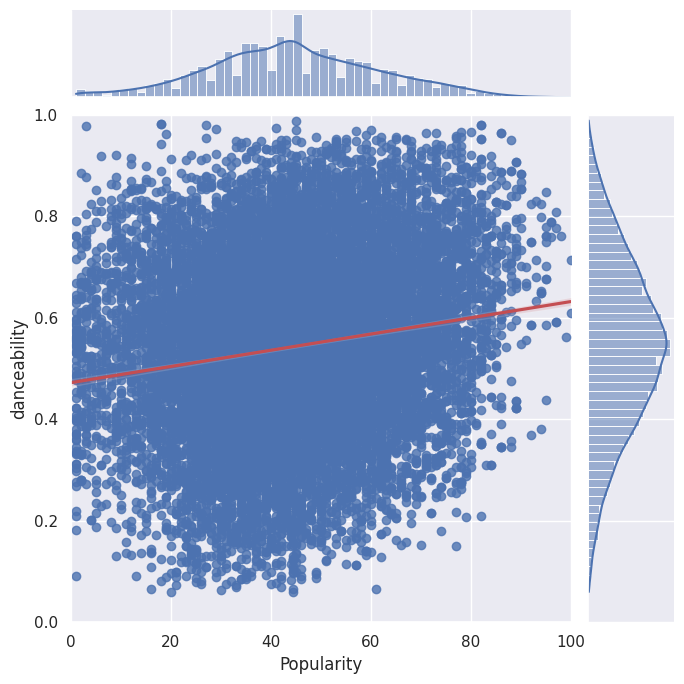

In [105]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="Popularity", y="danceability", data=df,
                  kind="reg", truncate=False,
                  xlim=(0, 100), ylim=(0, 1),
                  color="b", height=7, joint_kws={'line_kws': {'color':'r'}})

In [106]:
df2=df[['Popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms']]
df2.head()

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,60.0,0.854,0.564,-4.964,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0
1,54.0,0.382,0.814,-7.230,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0
2,35.0,0.434,0.614,-8.334,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0
3,66.0,0.853,0.597,-6.528,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0
4,53.0,0.167,0.975,-4.279,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0


### Correlation Heatmap
En cuanto a la visualización de la correlación que tienen las variables de "Popularity", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo" y "duration_in min/ms" se produce un mapa de calor de correlación. Se analizó que como resultado las variables que tienen mayor correlación con la variable "Popularity" son  "danceability" y "loudness".


<Axes: >

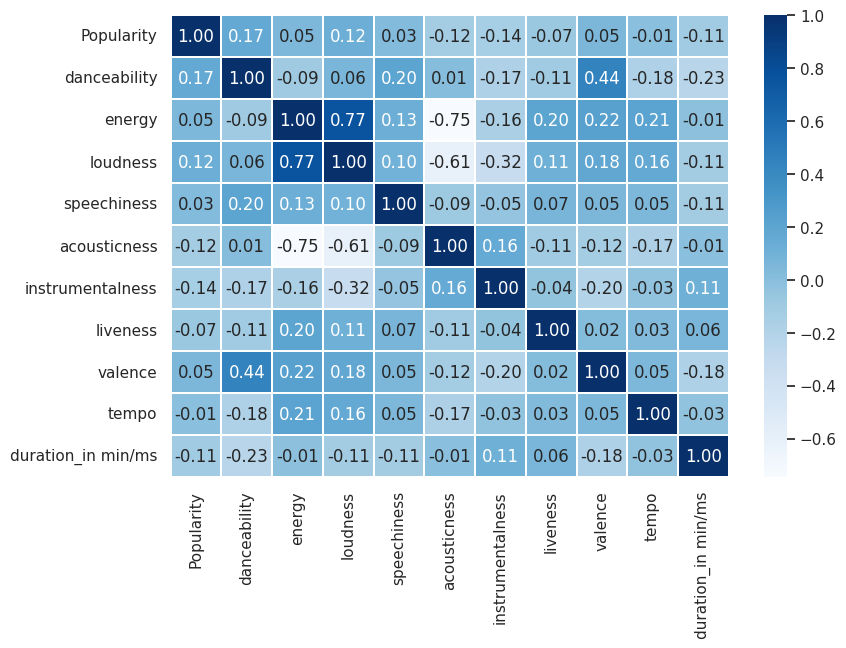

In [107]:
fig, ax = plt.subplots(figsize = (9, 6))
sns.heatmap(data = df2.corr(), cmap ='Blues', linewidths = 0.30, annot =True,fmt='.2f')

### Boxplot
Con el objetivo de ver la relación que tienen el género de las canciones con su popularidad se genera un boxplot. En el eje horizontal de la visualización se representa la popularidad de las canciones, mientras que en el eje vertical se observan cada una de las categorías de género. Esta gráfica presenta información acerca del rango intercuartil, la mediana, la cual indica la variabilidad en la popularidad dentro de cada género, así como los valores atípicos. Al examinar los datos proporcionados por el boxplot se resalta que el género "Country" tiende a ser más popular, pues presenta una mediana más alta que el resto, mientras que "Indie" y "Alternative" tienen canciones excepcionalmente populares. Por otro lado, el género con menor popularidad es el de "Bollywood" con una mediana menor.

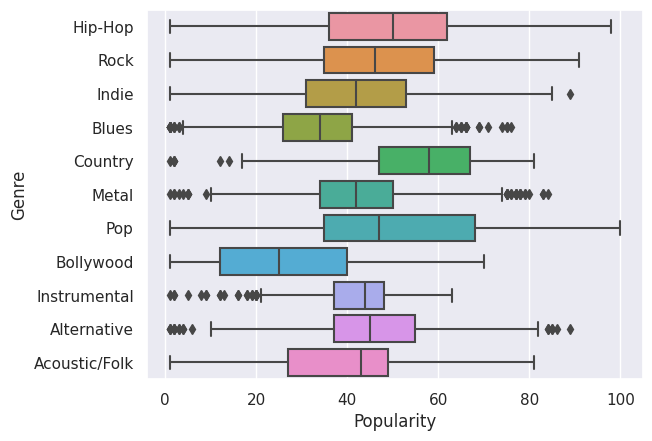

In [108]:
sns.boxplot(x=df['Popularity'],y=df['Genre']) #Distribución de popularidad por Género musical
plt.show()

### Worldcloud de artistas
Palabras más comunes en los nombres de artistas, por alguna razón resalta "Ben".

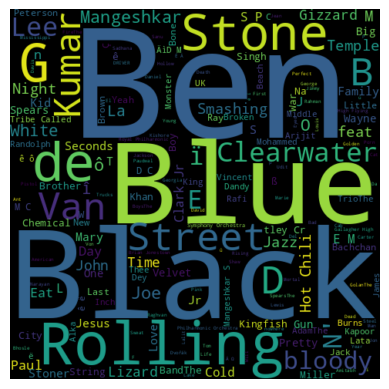

In [109]:
# Create the wordcloud object
artist_array = ''.join(df['Artist Name'])
wordcloud = WordCloud(width=480, height=480, margin=0).generate(artist_array)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
#sns.violinplot(x=df["species"], y=df["sepal_length"])

### Worldcloud de nombres de canciones
Palabras más comunes en nombres de canciones, resaltan feat, Love ,remastered y live. A su vez, ecnontramos caracteres inusuales que corresponden en buena parte a los datos basura dentro de la columna

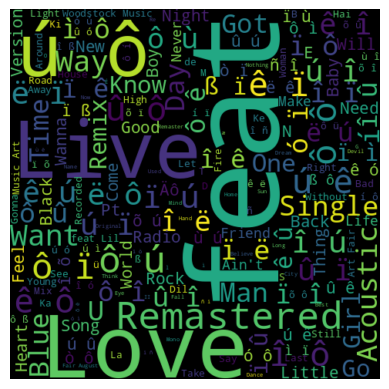

In [110]:
# Create the wordcloud object
track_array = ''.join(df['Track Name'])
wordcloud = WordCloud(width=480, height=480, margin=0).generate(track_array)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Text(0.5, 0.98, 'Popularity count per Genre')

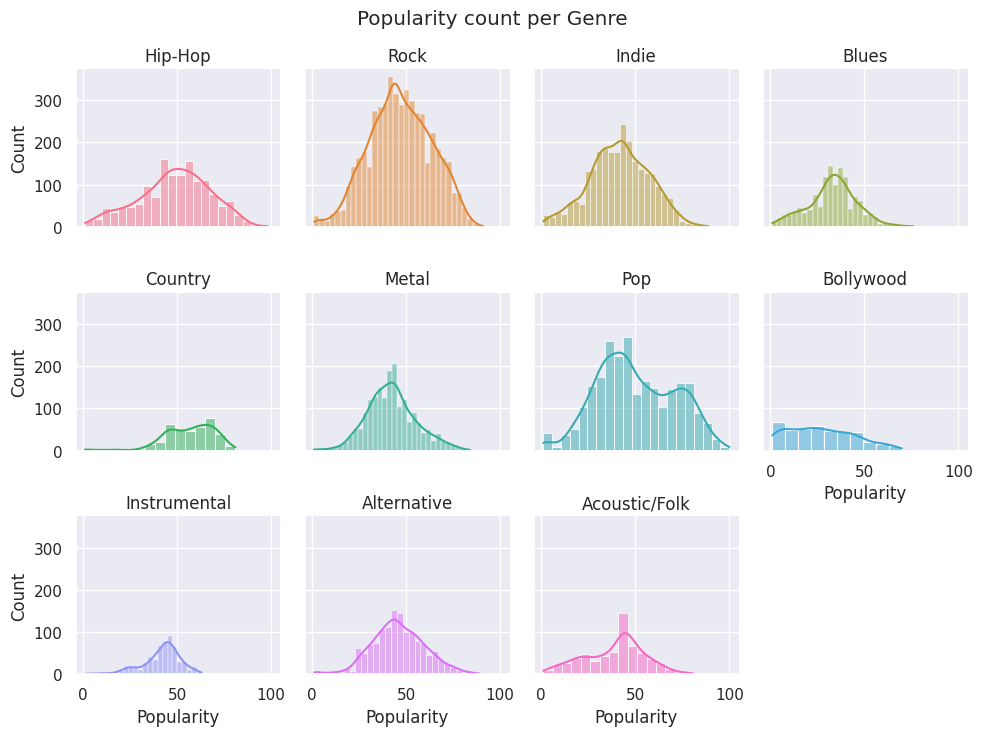

In [111]:
g = sns.FacetGrid(df, col='Genre',hue = 'Genre', col_wrap=4, height=2.5)
g.map(sns.histplot,'Popularity', kde = True)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Popularity count per Genre')

#fig, axs = plt.subplots(4, 3, figsize=(7, 7))
#axs = sns.FacetGrid(data = df, col = 'Genre',hue = 'Genre')
#axs.map(sns.histplot, 'Popularity', kde = True)

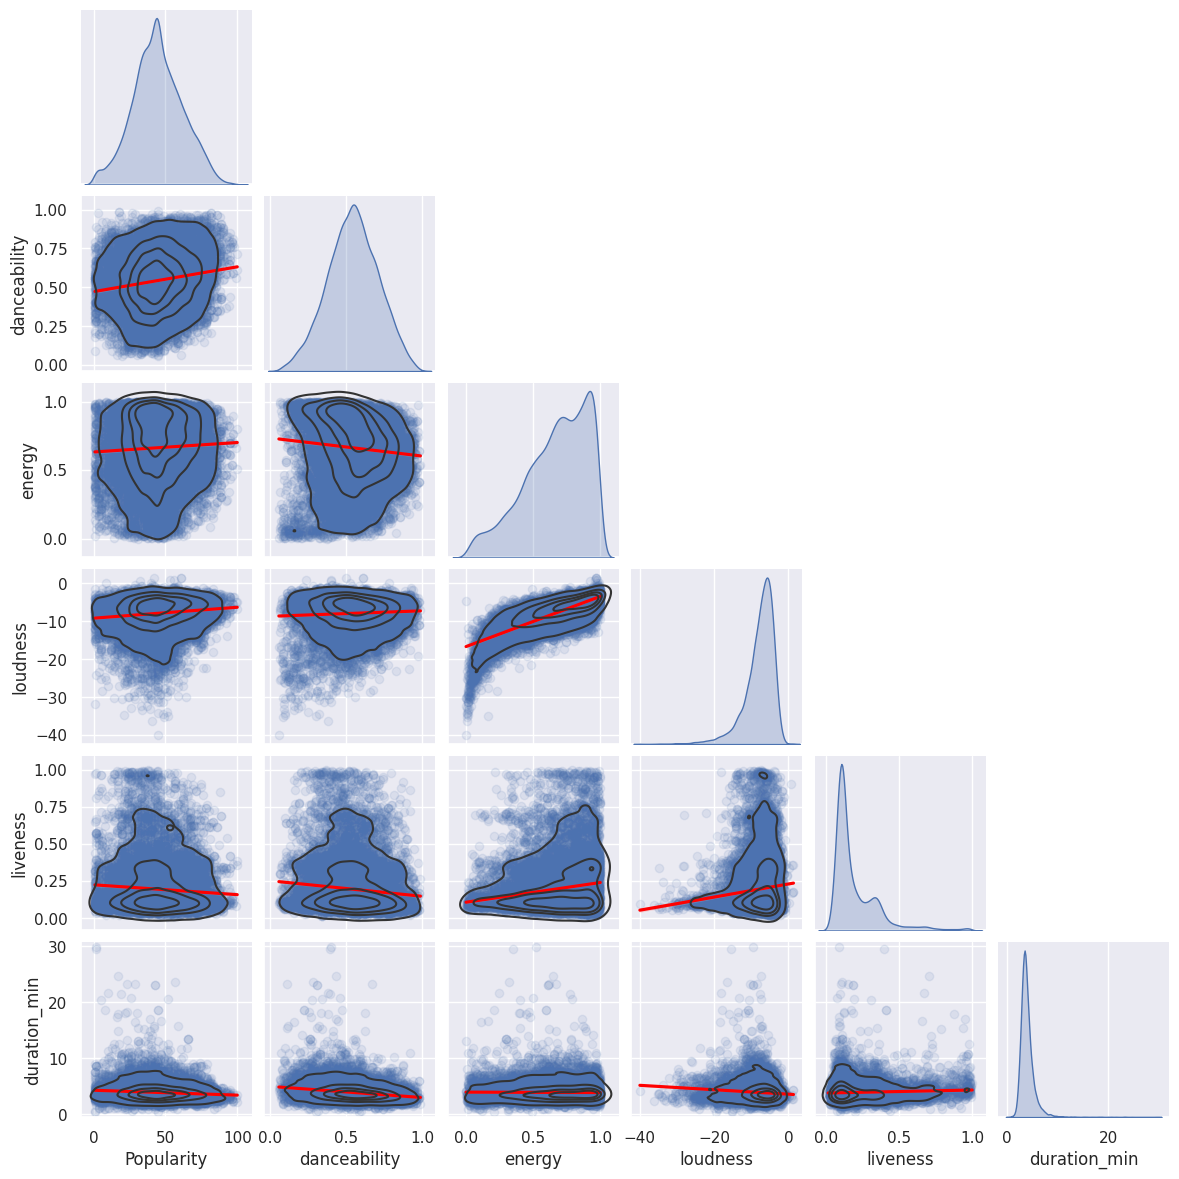

In [113]:
#Pairplot with the most relevant or significant variables
df3=df[['Popularity','danceability','energy','loudness','liveness','duration_min']]
g = sns.pairplot(df3, kind="reg", diag_kind = 'kde',height=2,corner = True, plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
#makes the lower half have a sort of heat map density
g.map_lower(sns.kdeplot, color=".2",levels=5)
plt.show()

In [ ]:
ax = sns.countplot(y = 'Genre', data = df, palette = 'viridis', order = df['Genre'].value_counts().index)
for bars in ax.containers:
  ax.bar_label(bars,size= 10)

In [ ]:
#Estadística Básica
columnas_numericas = df.select_dtypes(include=[int, float])

#Coeficiente de asimetria
coeficiente_asimetria_dict = {}

for i in columnas_numericas.columns:
    coeficiente = columnas_numericas[i].skew()
    coeficiente_asimetria_dict[i] = coeficiente

print(f"coeficiente de asimetría: {coeficiente_asimetria_dict}")

#Coeficiente de variación (%)
coeficiente_variacion_dict = {}

for i in columnas_numericas.columns:
    media = columnas_numericas[i].mean()
    desviacion_estandar = columnas_numericas[i].std()
    coeficiente_variacion = (desviacion_estandar / media) * 100
    coeficiente_variacion_dict[i] = coeficiente_variacion

print(f"coeficiente de variación: {coeficiente_variacion_dict}")


###Transformación de Box-Cox


In [ ]:
fig, axs = plt.subplots(2,5, figsize=(15, 5))

sns.histplot(data=df, x="Popularity", kde=True, color="skyblue", ax=axs[0, 0]).set_title('Popularity')
sns.histplot(data=df, x="danceability", kde=True, color="olive", ax=axs[0, 1]).set_title('danceability')
sns.histplot(data=df, x="energy", kde=True, color="gold", ax=axs[0, 2]).set_title('energy')
sns.histplot(data=df, x="loudness", kde=True, color="teal", ax=axs[0, 3]).set_title('loudness')
sns.histplot(data=df, x="speechiness", kde=True, color="#F387FE", ax=axs[0, 4]).set_title('speechiness')
sns.histplot(data=df, x="acousticness", kde=True, color="#FECB87", ax=axs[1, 0]).set_title('acousticness')
sns.histplot(data=df, x="instrumentalness", kde=True, color="#EE5824", ax=axs[1, 1]).set_title('instrumentalness')
sns.histplot(data=df, x="liveness", kde=True, color="#7FE07C", ax=axs[1, 2]).set_title('liveness')
sns.histplot(data=df, x="valence", kde=True, color="#A6ADD6", ax=axs[1, 3]).set_title('valence')
sns.histplot(data=df, x="tempo", kde=True, color="#BB99E7", ax=axs[1, 4]).set_title('tempo')

for ax in axs.flat:
    ax.label_outer()

axs = axs.flatten()
for ax in axs:
    ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])

plt.xticks(visible=False)

plt.show()


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
data_popularity, lambda_popularity = st.boxcox(df['Popularity'])

### test de Grubbs


%%%%%%%%%%%%%%%

In [115]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,duration_min
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.286286,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.358233e+05,3.924039,6.695821,3.930388
std,17.218436,0.166268,0.235373,3.549335,4.049151,0.480949,0.083576,0.310632,0.264499,0.159212,0.240195,29.571527,8.567503e+04,0.361618,3.206073,1.427917
min,1.000000,0.059600,0.000020,0.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,2.332000e+04,1.000000,0.000000,0.388667
25%,33.000000,0.432000,0.509000,2.000000,-9.538000,0.000000,0.034800,0.004300,0.000294,0.097500,0.297000,99.620750,1.876497e+05,4.000000,5.000000,3.127496
50%,44.000000,0.545000,0.700000,5.000000,-7.016000,1.000000,0.047400,0.081400,0.049850,0.129000,0.481000,120.065500,2.200000e+05,4.000000,8.000000,3.666667
75%,56.000000,0.659000,0.860000,8.000000,-5.189000,1.000000,0.083000,0.434000,0.177562,0.258000,0.672000,141.969250,2.630822e+05,4.000000,10.000000,4.384704
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.793160e+06,5.000000,10.000000,29.886000
